In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import time

### Задание 1
#### ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле scipy.stats.

(например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cosine.html#scipy.stats.cosine)

Сгенерируйте примеры из распределения

In [2]:
# Распределение arcsin
arcsine_rv = sts.arcsine()

In [3]:
# Настоящее среднее и настоящая дисперсия случайной величины для данного распределения
real_mean, real_var = arcsine_rv.mean(), arcsine_rv.var()
real_mean, real_var

(0.5, 0.125)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


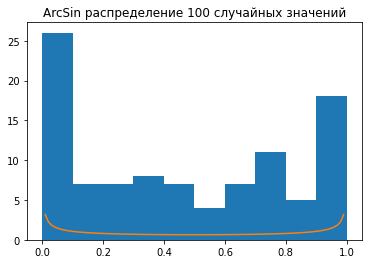

In [4]:
# Пример распределения 100 случайных наблюдений из данного распределения
n = 100
plt.hist(arcsine_rv.rvs(n))
x = np.linspace(0,1,100)
pdf = arcsine_rv.pdf(x)
plt.plot(x, pdf)
plt.title(f"ArcSin распределение {n} случайных значений")
plt.show()

Постройте гистограмму выборки и теоретическую плотность распределения

[]

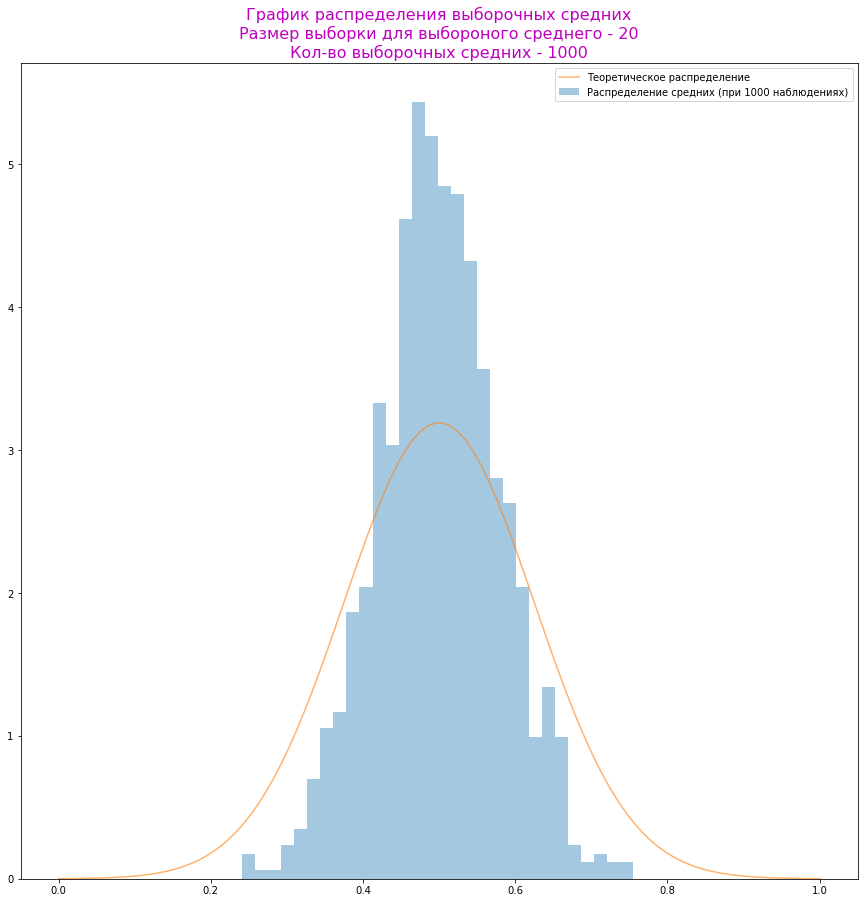

In [5]:
plt.figure(figsize=(15,15))

rv = sts.arcsine()
sample_size = 20
n_random_values = [1000]

for n in n_random_values:
    sample_means = [np.mean(rv.rvs(sample_size)) for _ in range(n)]
    #sample_means = np.array(sample_means).astype(np.float32)
    plt.hist(sample_means, density=True, bins=30, label=f"Распределение средних (при {n} наблюдениях)", alpha=.4)

theory_rv = sts.norm(loc=rv.mean(), scale=rv.var())
x_th = np.linspace(0, 1, 100)
pdf_th = theory_rv.pdf(x_th)
plt.plot(x_th, pdf_th, label=f"Теоретическое распределение",  alpha=.6)

plt.title(f"График распределения выборочных средних\n"\
          f"Размер выборки для выбороного среднего - {sample_size}\n"\
          f"Кол-во выборочных средних - {n}", 
          color="m", 
          fontsize=16)
plt.legend()
plt.plot()

#### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

[]

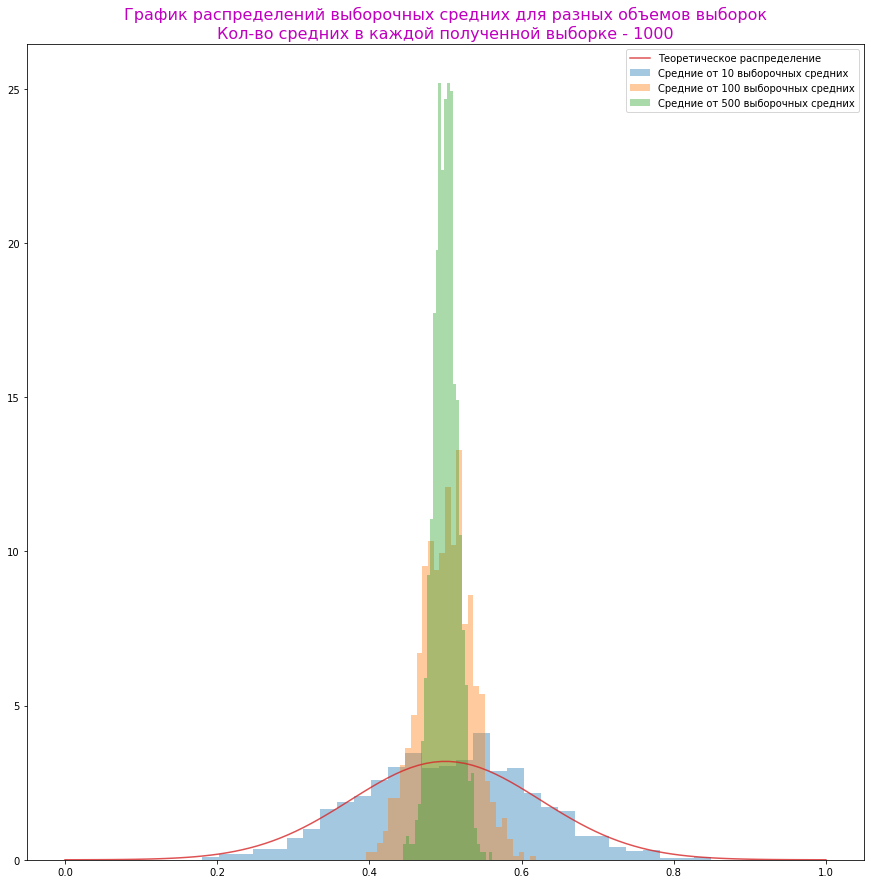

In [6]:
plt.figure(figsize=(15,15))

rv = sts.arcsine()
sample_size = 1000
N = [10, 100, 500]

for n in N:
    sample_means = [np.mean(rv.rvs(n)) for _ in range(sample_size)]
    #sample_means = np.array(sample_means).astype(np.float32)
    plt.hist(sample_means, density=True, bins=30, label=f"Средние от {n} выборочных средних", alpha=.4)
    
norm_rv = sts.norm(loc=rv.mean(), scale=rv.var())
x = np.linspace(0, 1, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label=f"Теоретическое распределение",  alpha=.8)

plt.title(f"График распределений выборочных средних для разных объемов выборок\n"\
          f"Кол-во средних в каждой полученной выборке - {sample_size}", 
          color="m", 
          fontsize=16)
plt.legend()
plt.plot()

По графику видно, что с ростом объема выборки, путем увеличения размера выборки по которой рассчитывается выборочное среднее, распределение приближается к нормальному и происходит концентрация полученных случайных величин вокруг математического ожидания исходного распределения.

Для определения того, насколько хорошо распределение приближается к нормальному, построю график распределения для разных объемов выборок с фиксированным размером выборок по которым считаются выборочные средние.

[]

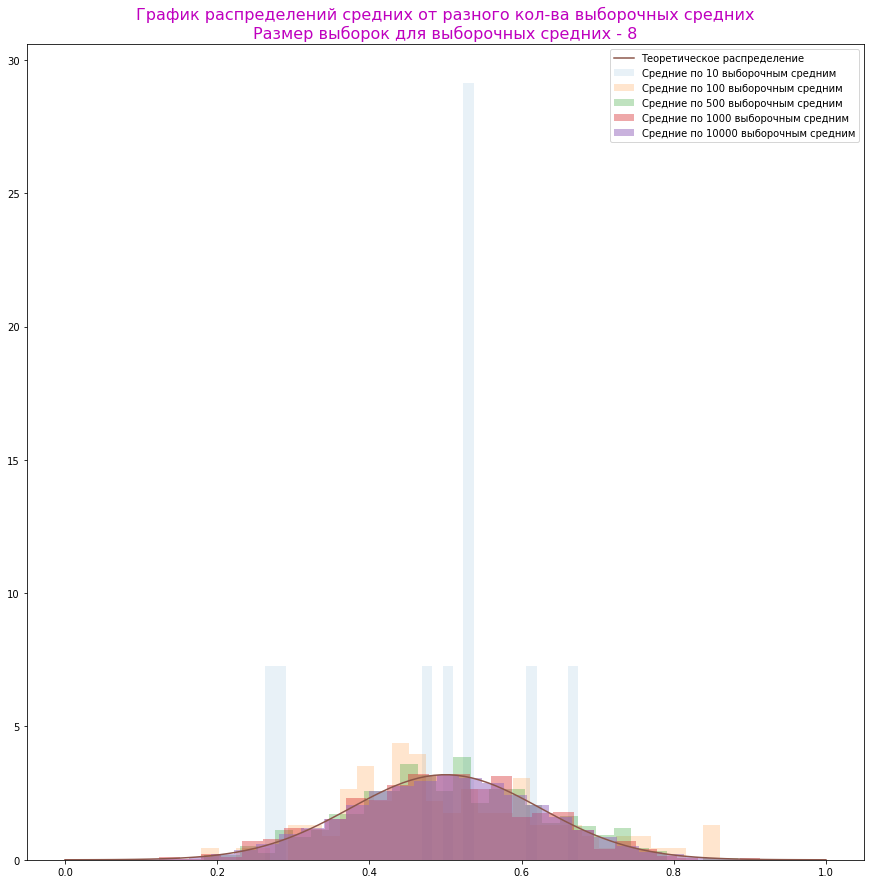

In [9]:
plt.figure(figsize=(15,15))

rv = sts.arcsine()
sample_sizes = [10, 100, 500, 1000, 10000]
N = 8

for i, sample_size in enumerate(sample_sizes):
    a = .1 + ((i)/len(sample_sizes))/2
    sample_means = [np.mean(rv.rvs(N)) for _ in range(sample_size)]
    sample_means = np.array(sample_means).astype(np.float32)
    plt.hist(sample_means, density=True, bins=30, label=f"Средние по {sample_size} выборочным средним", 
             alpha=a
            )
    
norm_rv = sts.norm(loc=rv.mean(), scale=rv.var())
x = np.linspace(0, 1, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label=f"Теоретическое распределение",  alpha=1)

plt.title(f"График распределений средних от разного кол-ва выборочных средних\n"\
          f"Размер выборок для выборочных средних - {N}", 
          color="m", 
          fontsize=16)
plt.legend()
plt.plot()

По графику видно, что с фиксированным размером выборки для рассчета выборочного среднего и увеличением кол-ва рассчитываемых средних - распределение приближается к теоретическому.



#### Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо? 
#### Ваш ответ: 
Исходя из результатов основанных на визуальном анализе, для данного распределения, апроксимация работает хорошо.

### Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел).

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравните результаты.

Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [12]:
# https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
url="https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df.shape

(3333, 21)

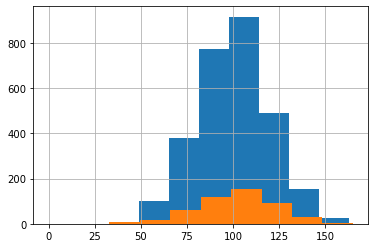

In [14]:
df.groupby("churn")["total day calls"].hist();

In [17]:
df.groupby("churn")["total day calls"].count()

churn
False    2850
True      483
Name: total day calls, dtype: int64

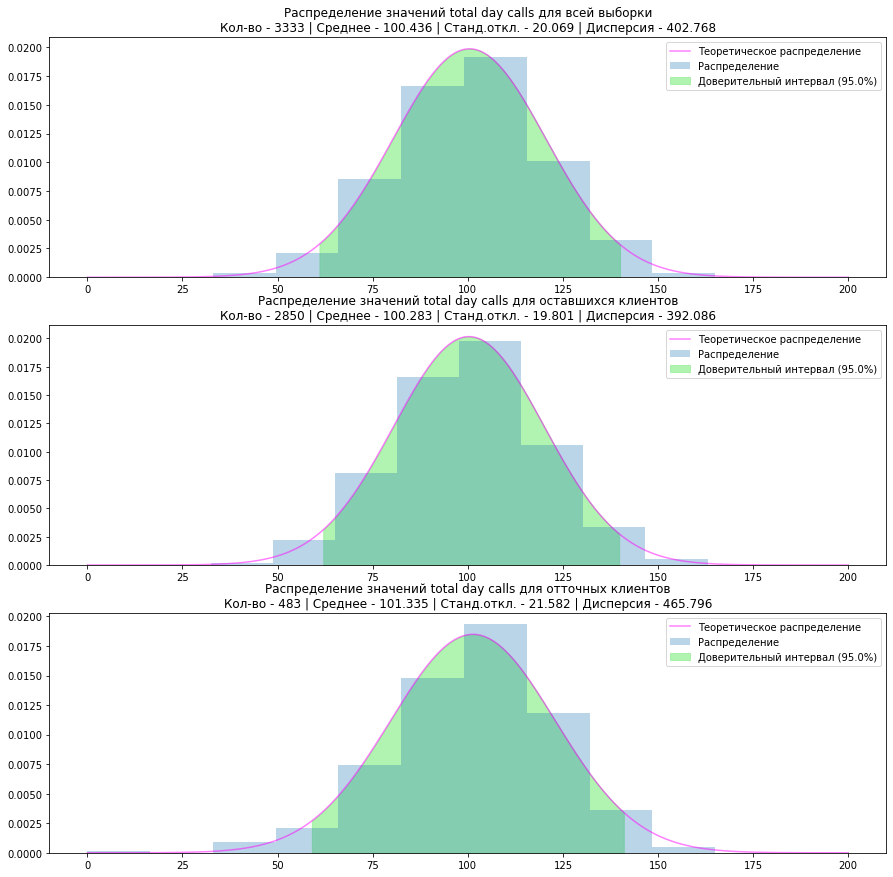

In [19]:
s0 = df["total day calls"]
s1 = df[df["churn"] == False]["total day calls"]
s2 = df[df["churn"] == True]["total day calls"]
S = [s0, s1, s2]

def visualise(s:object, ax:object) -> None:
    mean = s.mean()
    std = s.std(ddof=1)
    var = s.var(ddof=1)
    n = len(s)
    
    norm_rv = sts.norm(loc=mean, scale=var**.5)
    x = np.linspace(0, 200, 1000)
    pdf = norm_rv.pdf(x)
    
    alpha = 0.05
    q_left = s.quantile(alpha/2)
    q_right = s.quantile(1-alpha/2)
    to_fill = np.linspace(q_left, q_right, 100)
    
    ax.hist(s, density=True, 
            label="Распределение",
            alpha=.3)
    ax.fill_between(to_fill, norm_rv.pdf(to_fill),
            label=f"Доверительный интервал ({(1-alpha)*100}%)",
            alpha=.7, color='lightgreen')
    ax.plot(x, pdf, 
            label="Теоретическое распределение", 
            alpha=.5, color='magenta')
    ax.set_title(f"Распределение значений total day calls для "\
                 f"{'всей выборки' if n==len(s0) else 'отточных клиентов' if n==len(s2) else 'оставшихся клиентов'}\n"\
                 f"Кол-во - {n} | Среднее - {mean:.3f} | Станд.откл. - {std:.3f} | Дисперсия - {var:.3f}")
    ax.legend()
    
fig, axs = plt.subplots(3, 1, figsize=(15,15))

for i, s in enumerate(S):
    visualise(s, axs[i])

In [20]:
# mean +- z_alpha/2 * (std / sqrt(size))
   
Z_a = 1.96
z_interval = lambda s, z: ((s.mean() - z*s.std(ddof=1) / np.sqrt(n)), (s.mean() + z*s.std(ddof=1) / np.sqrt(n)))

print(f"Рассчет доверительного интервала по формуле : \n")
for s in S:
    n = len(s)
    interval = z_interval(s, Z_a)
    z_lower = interval[0]
    z_upper = interval[1]
    print(f"Z-интервал для "\
          f"{'всей выборки' if n==len(s0) else 'отточных клиентов' if n==len(s2) else 'оставшихся клиентов'} - "\
          f"({z_lower:.3f} - {z_upper:.3f})")

Рассчет доверительного интервала по формуле : 

Z-интервал для всей выборки - (99.754 - 101.117)
Z-интервал для оставшихся клиентов - (99.556 - 101.010)
Z-интервал для отточных клиентов - (99.411 - 103.260)


In [21]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats._zconfint_generic.html
from statsmodels.stats.weightstats import _zconfint_generic

alpha = 0.05
z_interval_lib = lambda s, a: _zconfint_generic(s.mean(), s.std(ddof=1)/np.sqrt(len(s)), a, "two-sided")

print(f"Рассчет доверительного интервала используя библиотеку : \n")
for s in S:
    n = len(s)
    interval = z_interval_lib(s, alpha)
    z_lower = interval[0]
    z_upper = interval[1]
    print(f"Z-интервал для "\
          f"{'всей выборки' if n==len(s0) else 'отточных клиентов' if n==len(s2) else 'оставшихся клиентов'} - "\
          f"({z_lower:.3f} - {z_upper:.3f})")

Рассчет доверительного интервала используя библиотеку : 

Z-интервал для всей выборки - (99.754 - 101.117)
Z-интервал для оставшихся клиентов - (99.556 - 101.010)
Z-интервал для отточных клиентов - (99.411 - 103.260)


Значения для доверительных интервалов совпадают.